# K-means clustering 

## import library

In [291]:
import numpy as np
from tqdm import tqdm
import time

from mycode import MyPlot
from mycode import MyData
from mycode import MyModel
from mycode import MyEval
from mycode import MyResult

In [292]:
plot    = MyPlot()
data    = MyData()
result  = MyResult()
eval    = MyEval()
model   = MyModel()

In [293]:
result.plot_info()

******************************
name  : 태하영
id    : 01053151074
email : zixpotf5803@cau.ac.kr
tel   : 010-5315-1074
******************************


<hr>

## image data

In [294]:
data1 = data.get_data(1)
data2 = data.get_data(2)
data3 = data.get_data(3)
data4 = data.get_data(4)

In [295]:
print(data1.shape, data2.shape, data3.shape, data4.shape)
print(data1.dtype, data2.dtype, data3.dtype, data4.dtype)

(1000, 12, 12) (1000, 12, 12) (1000, 12, 12) (1000, 12, 12)
float32 float32 float32 float32


<hr>

## plot data

<hr>

## class 1

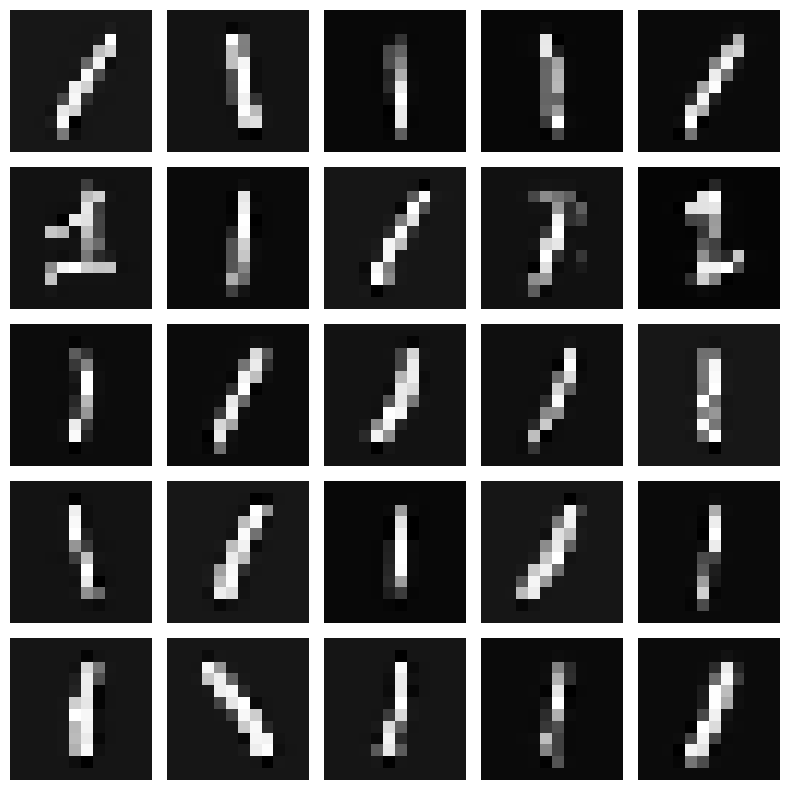

In [296]:
plot.plot_data(data1)

## class 2 

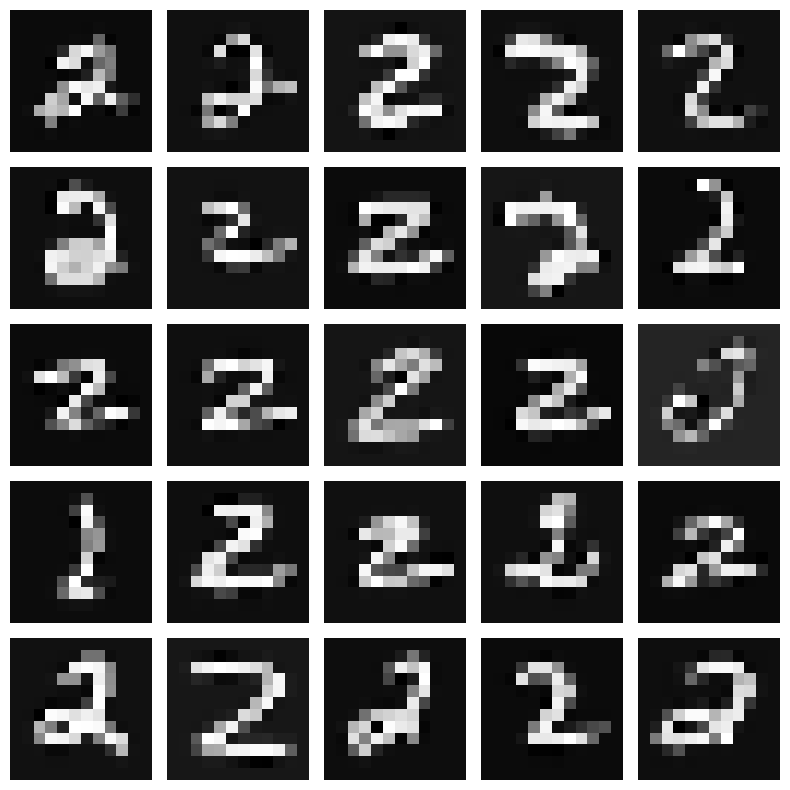

In [297]:
plot.plot_data(data2)

## class 3 

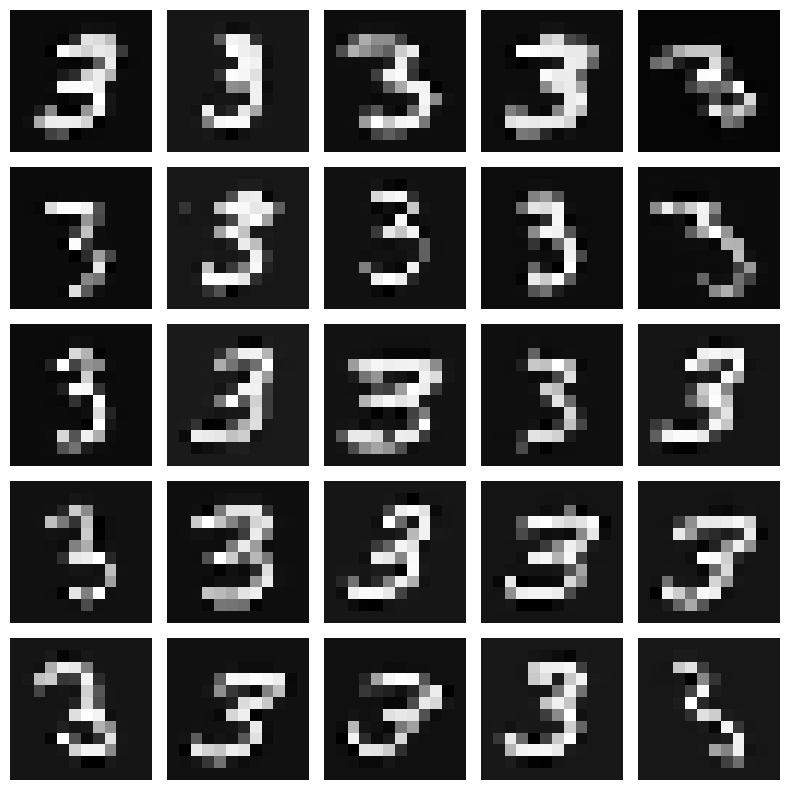

In [298]:
plot.plot_data(data3)

In [299]:
## class 4 

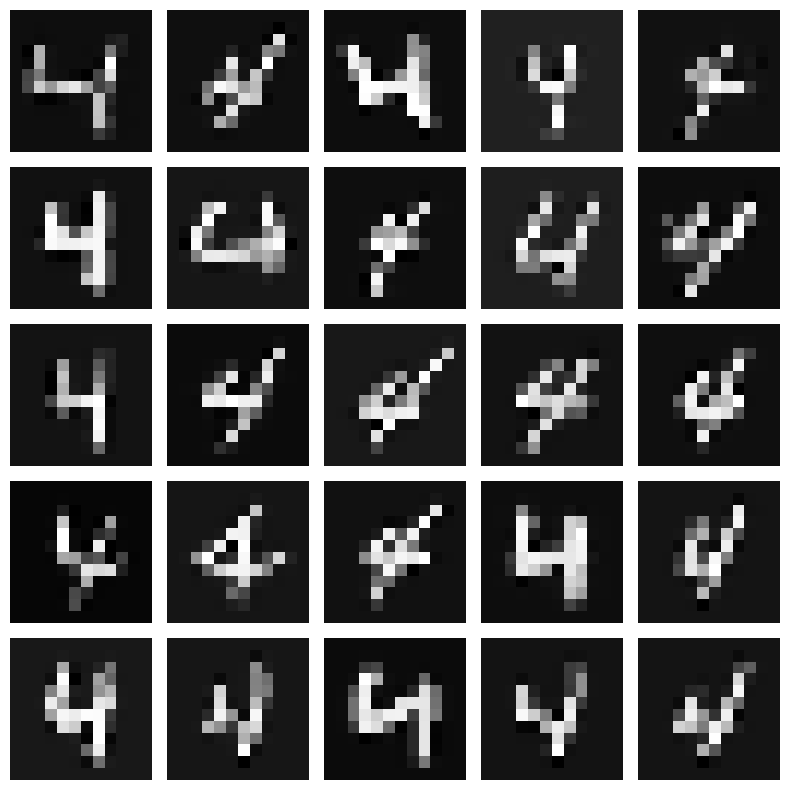

In [300]:
plot.plot_data(data4)

<hr>

## construct the data

In [301]:
data = np.concatenate((data1, data2, data3, data4))
num_data = len(data)

In [302]:
print(num_data, data.shape, data.dtype)

4000 (4000, 12, 12) float32


<hr>

## parameter setting

In [303]:
cluster     = [0, 1, 2, 3]
num_cluster = len(cluster)
num_data_per_cluster = 1000
model.set_cluster(cluster)
eval.initialize(cluster, num_data_per_cluster)

<hr>

## initialize label

In [304]:
label = np.random.randint(num_cluster, size=num_data)

In [305]:
print(len(label), label.shape, label.dtype)

4000 (4000,) int64


<hr>

## plot initial centroid

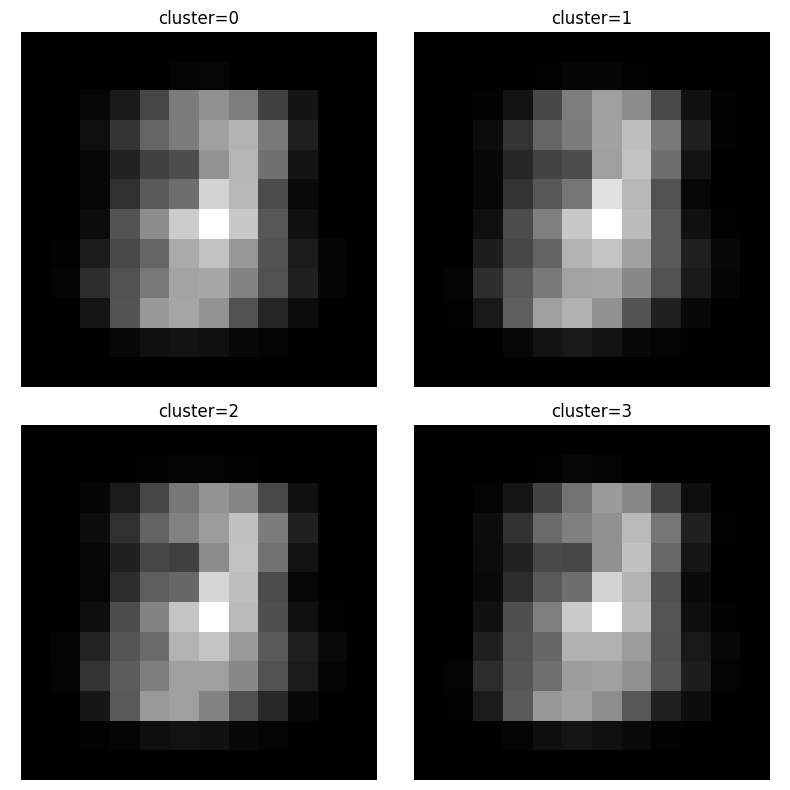

In [306]:
plot.plot_centroid(data, label, cluster)

<hr>

## training

In [307]:
num_iter        = model.get_num_iter()
loss_iter       = np.zeros(num_iter)
accuracy_iter   = np.zeros(num_iter)

In [308]:
feature     = model.compute_feature(data)
dim_feature = feature.shape[1]

## validity check of the feature function

In [ ]:
feature_first   = model.compute_feature_first(data)
feature_last    = model.compute_feature_last(data)

if ((feature[:, 0] == feature_first) & (feature[:,-1] == feature_last)).all():
    print('Success')
else:
    assert False, 'Failure'

## optimization

In [310]:
for i in tqdm(range(num_iter), desc="k-means clustering", unit="iter"):
    centroid            = model.compute_centroid(feature, label)
    distance            = model.compute_distance(feature, centroid)
    label               = model.compute_label(distance)
    loss                = model.compute_loss(distance, label)
    accuracy            = eval.compute_accuracy(label)
    loss_iter[i]        = loss
    accuracy_iter[i]    = accuracy

k-means clustering: 100%|██████████| 20/20 [00:00<00:00, 836.85iter/s]


In [311]:
print(centroid.shape, centroid.dtype)
print(distance.shape, distance.dtype)
print(label.shape, label.dtype)

(4, 78) float32
(4000, 4) float32
(4000,) int64


<hr>

## plot loss

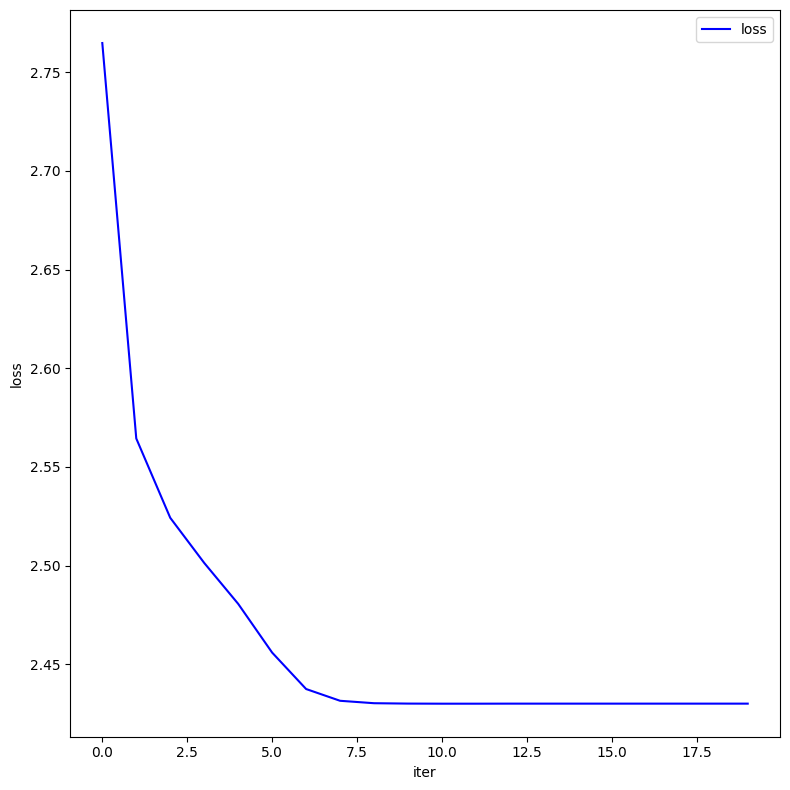

In [312]:
plot.plot_curve(loss_iter, 'loss', 'iter', 'loss')

<hr>

## plot accuracy

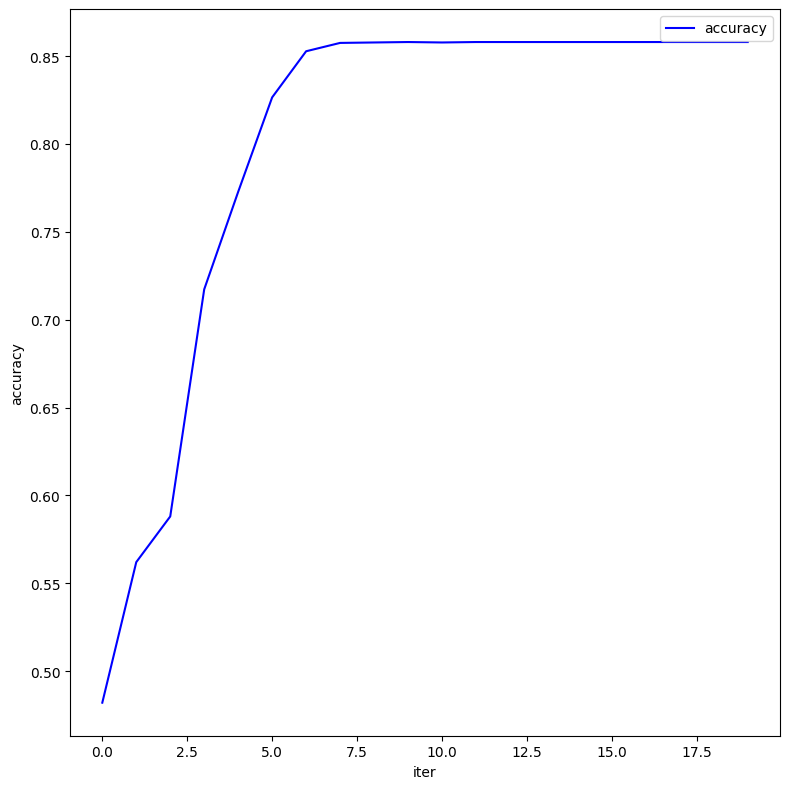

In [313]:
plot.plot_curve(accuracy_iter, 'accuracy', 'iter', 'accuracy')

<hr>

## plot centroid 

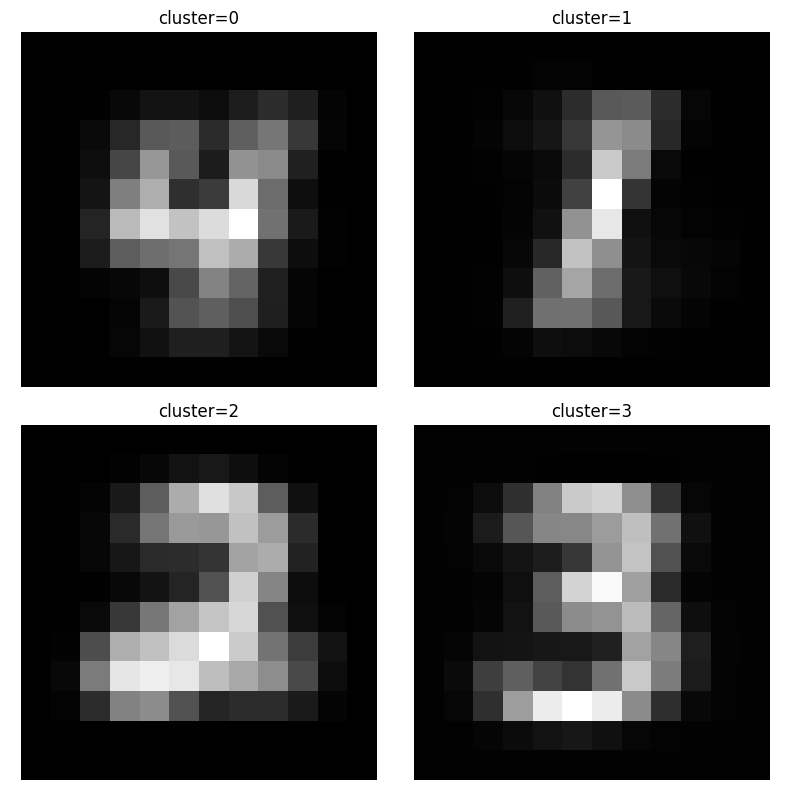

In [314]:
plot.plot_centroid(data, label, cluster)

<hr>

## save results

In [315]:
result.empty()

In [316]:
accuracy    = '{:.5f}'.format(accuracy_iter[-1].item())
dim_feature = '{:d}'.format(feature.shape[1])

In [317]:
result.add_result('accuracy', accuracy)
result.add_result('number of features', dim_feature)

In [318]:
result.save()

<hr>

## plot results

In [319]:
result.plot()

******************************
name  : 태하영
id    : 01053151074
email : zixpotf5803@cau.ac.kr
tel   : 010-5315-1074
******************************
[accuracy] : 0.85800
[number of features] : 78
